# Acquisition Phase

In [1]:
# Importing all necessary modules and functions for the project

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy import stats

import acquire
import prepare

### <font color="blue">The acquire module below uses an env.py file that has my log in info to get the csv file from the Codeup DataBase (db)</font>

In [2]:
# Accessing the file and writing it into a CSV file on my computer

telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


# Preparation Phase

### <font color="blue">The prepare module does the following:
    - drops duplicate columns
    - drops null values that do not affect the outcome of the modeling process
    - Bins the tenure columns for a more succint visualization
    - Converts binary and non-binary categorical variables to numeric through manuak encoding and one-hot encoding
    - Splits the data into train, validate, and test groups</font>

In [3]:
train, validate, test = prepare.prep_telco_data(telco)

In [4]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,0,0,0,1,0,1,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1


# Exploration Phase

### <font color="blue">I quickly check for missing values (None or NaN ) and the integrity of the data</font>

In [5]:
# Isna will confirm that I do not have 

train.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [6]:
validate.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
816,Female,0,Yes,No,27,Yes,Yes,No,No,No,...,1,0,1,0,0,1,0,1,0,0
1488,Female,0,Yes,No,71,Yes,Yes,Yes,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
4796,Male,0,No,No,44,No,No phone service,Yes,No,Yes,...,1,0,1,1,0,0,0,0,1,0
3213,Female,0,Yes,Yes,27,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
5026,Male,0,Yes,Yes,62,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0


In [7]:
# Isna will confirm that I do not have 

validate.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

In [8]:
test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,Female,0,No,No,29,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,1,0,0,1
6330,Male,0,Yes,Yes,36,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,1,0,0
6156,Male,1,No,No,1,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,1,0
5313,Male,0,No,No,25,Yes,No,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1176,Female,0,Yes,No,34,Yes,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Isna will confirm that Ido not have 

test.isna().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
contract_type                            0
internet_service_type                    0
payment_type                             0
binned_tenure                            0
gender_encoded                           0
partner_encoded                          0
dependents_

There are no nulls in my train, validate, and test datasets

In [10]:
# I put the columns into a list to have the magnitude of the task because the columns are the features

train.columns.to_list()

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'binned_tenure_2years',
 'binned_tenure_3years',
 'binned_tenure_4years',
 'binned_tenure_5years',
 'binned_tenure_6years',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 's

### <font color="brown">A. Univariate visualizations (visualizing one variable at the time)</font>

### <font color="blue">I check the percentage of churned customers which is the target variable</font>

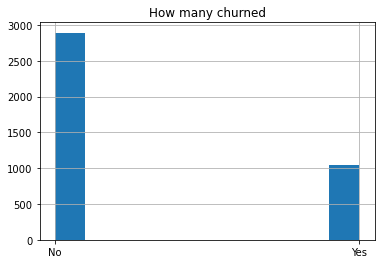

In [11]:
# Plotting a histogram of churn

plt.title('How many churned')
train.churn.hist()
plt.show()

In [12]:
# To get the churn percentage
round(train.churn_encoded.mean(), 2)

0.27

### <font color="blue">And also check the general distribution of all the columns through graph but sometimes statistical measures especially when they are very close or really far apart </font>

<font color="blue">The</font>

- **<font color="brown"> Categorical data</font>**

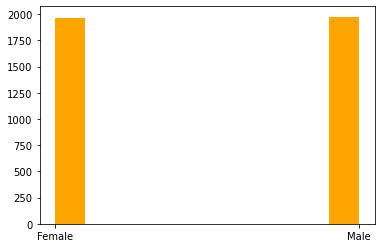

In [13]:
plt.hist(train['gender'], color='orange')
plt.show()

In [14]:
telco.gender.value_counts(normalize=True)*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

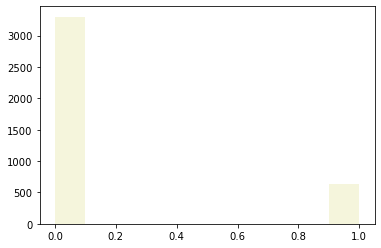

In [15]:
plt.hist(train['senior_citizen'], color='beige')
plt.show()

In [16]:
telco.senior_citizen.value_counts(normalize=True)*100

0    83.785319
1    16.214681
Name: senior_citizen, dtype: float64

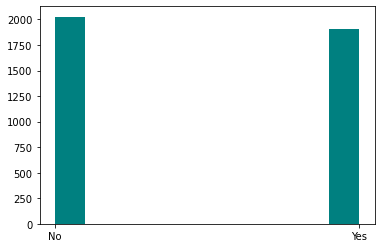

In [17]:
plt.hist(train['partner'], color='teal')
plt.show()

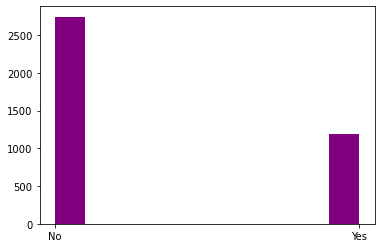

In [18]:
plt.hist(train['dependents'], color='purple')
plt.show()

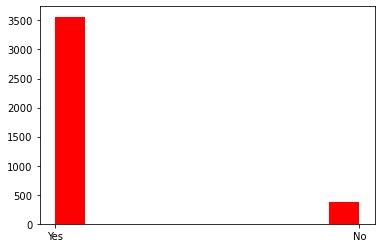

In [19]:
plt.hist(train['phone_service'], color='red')
plt.show()

In [20]:
telco.phone_service.value_counts(normalize=True)*100

Yes    90.316626
No      9.683374
Name: phone_service, dtype: float64

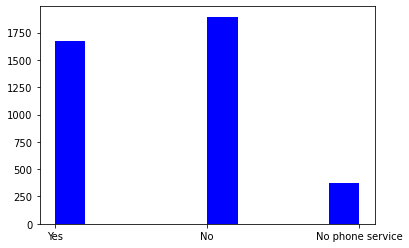

In [21]:
plt.hist(train['multiple_lines'], color='blue')
plt.show()

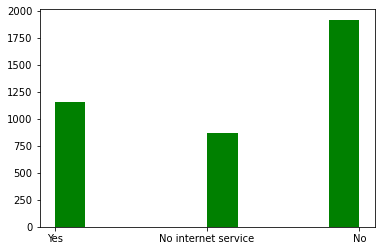

In [22]:
plt.hist(train['online_security'], color='green')
plt.show()

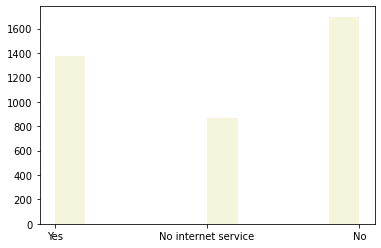

In [23]:
plt.hist(train['online_backup'], color='beige')
plt.show()

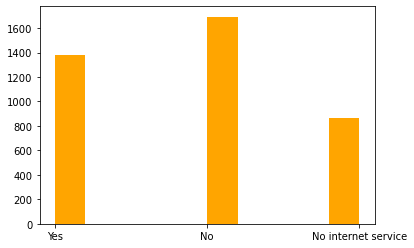

In [24]:
plt.hist(train['device_protection'], color='orange')
plt.show()

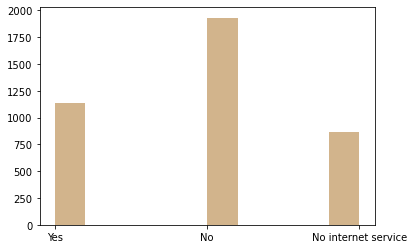

In [25]:
plt.hist(train['tech_support'], color='tan')
plt.show()

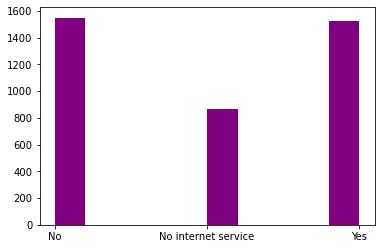

In [26]:
plt.hist(train['streaming_tv'], color='purple')
plt.show()

In [29]:
telco.streaming_tv.value_counts(normalize=True)*100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: streaming_tv, dtype: float64

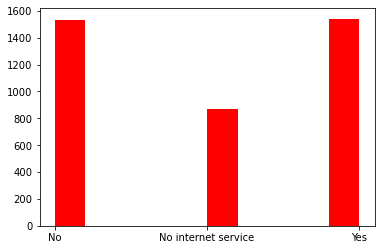

In [31]:
plt.hist(train['streaming_movies'], color='red')
plt.show()

In [30]:
telco.streaming_movies.value_counts(normalize=True)*100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: streaming_movies, dtype: float64

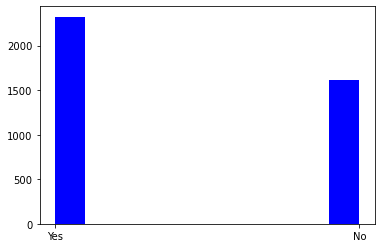

In [32]:
plt.hist(train['paperless_billing'], color='blue')
plt.show()

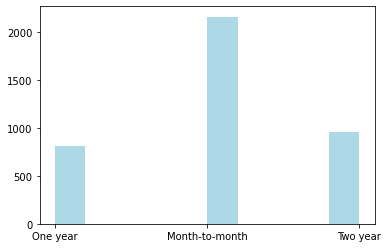

In [33]:
plt.hist(train['contract_type'], color='lightblue')
plt.show()

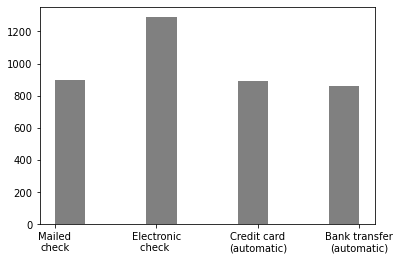

In [34]:
plt.hist(train['payment_type'], color='grey', )
plt.xticks([0, 1, 2, 3], ['Mailed\ncheck', 'Electronic\ncheck ', 'Credit card\n(automatic)', 'Bank transfer\n(automatic)'])
plt.show()

In [35]:
train.payment_type.value_counts(normalize=True)*100

Electronic check             32.740665
Credit card (automatic)      22.733045
Mailed check                 22.631445
Bank transfer (automatic)    21.894844
Name: payment_type, dtype: float64

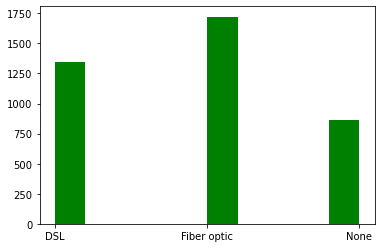

In [36]:
plt.hist(train['internet_service_type'], color='green')
plt.show()

- **<font color="brown"> Numerical data</font>**

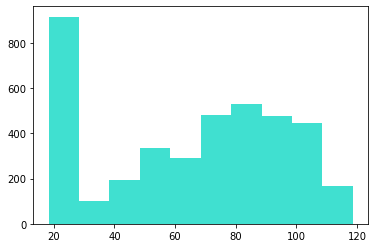

In [37]:
plt.hist(train['monthly_charges'], color='turquoise')
plt.show()

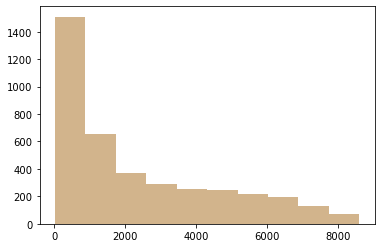

In [38]:
plt.hist(train['total_charges'], color='tan')
plt.show()

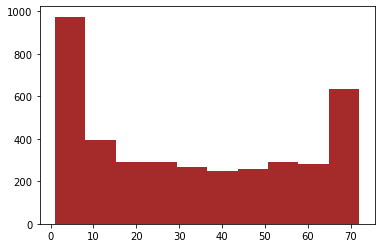

In [39]:
plt.hist(train['tenure'], color='brown')
plt.show()

# <font color="darkblue">Takeaways from Univariate exploration</font>

- Except for gender and partner, the rest of the columns don't have symetric of their values.
The most important uneven ones are:
    * phone service
    * dependent
    * Tenure
    * Monthly charges
    * Paperless billing
    * Contract type
- Tenure and monthly charges have approximately the same distribution
- Streaming TV and Streaming movies are approximately the same

<font color="fuchsia"> - The churn rate is at 27% which is above industry level and warrants a further examination</font>

### B. Bivariate exploration

In [51]:
train.columns[16]

'churn'

### <font color="blue">The big question now would be: who is churning?</font>

In [67]:
def frequency(ds, vars):
    if len(vars) > 1:
        c1 = ds[vars[0]]
        c2 = []
        for i in range(1,len(vars)):
            c2.append(ds[vars[i]])
        dfs = []
        dfs.append(pd.crosstab(c1,c2).unstack().reset_index().rename(columns={0:'Count'}))
        dfs.append(pd.crosstab(c1,c2, normalize='all').unstack().reset_index().rename(columns={0:'Percent'}))
        dfs = [df.set_index(vars) for df in dfs]
        df = dfs[0].join(dfs[1:]).reset_index()
        return df

In [64]:
frequency(train, ['gender',
                  'senior_citizen', 
                  'partner',
                  'dependents',
                  'tenure',
                  'phone_service',
                  'multiple_lines',
                  'online_security',
                  'online_backup',
                  'device_protection',
                  'tech_support',
                  'streaming_tv',
                  'streaming_movies',
                  'paperless_billing',
                  'monthly_charges',
                  'total_charges',
                  'churn',
                  'contract_type',
                  'internet_service_type',
                  'payment_type',
                  'binned_tenure'])

In [69]:
frequency(train, ['churn',
                  'binned_tenure'])

,churn,binned_tenure,Count,Percent
0,No,1year,639,0.162306
1,Yes,1year,581,0.147574
2,No,2years,386,0.098044
3,Yes,2years,146,0.037084
4,No,3years,367,0.093218
5,Yes,3years,102,0.025908
6,No,4years,347,0.088138
7,Yes,4years,92,0.023368
8,No,5years,391,0.099314
9,Yes,5years,68,0.017272


In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

In [40]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

gender,Female,Male
churn,,
No,0.498098,0.501902
Yes,0.498088,0.501912


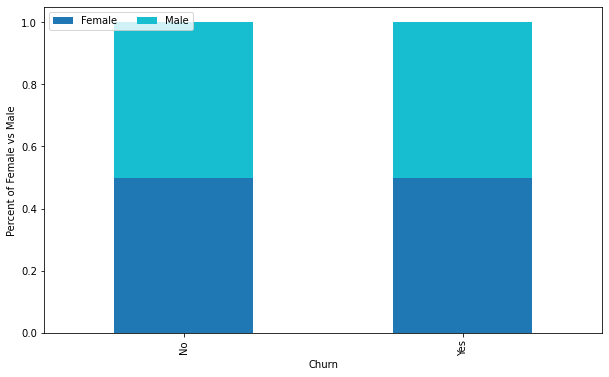

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [43]:
churn_senior_ctab = pd.crosstab(index=train.churn, columns=train.senior_citizen, normalize="index")
churn_senior_ctab

senior_citizen,0,1
churn,,
No,0.874092,0.125908
Yes,0.740918,0.259082


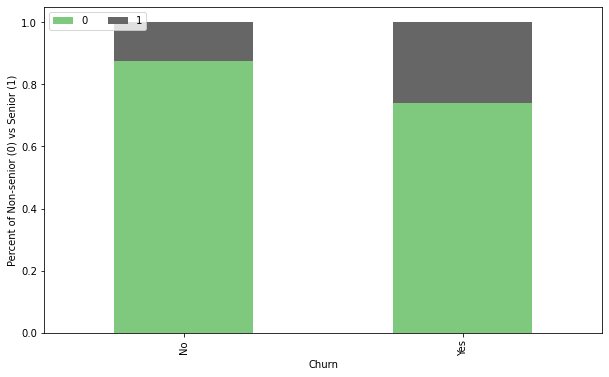

In [47]:
churn_senior_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='Accent', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Non-senior (0) vs Senior (1)")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

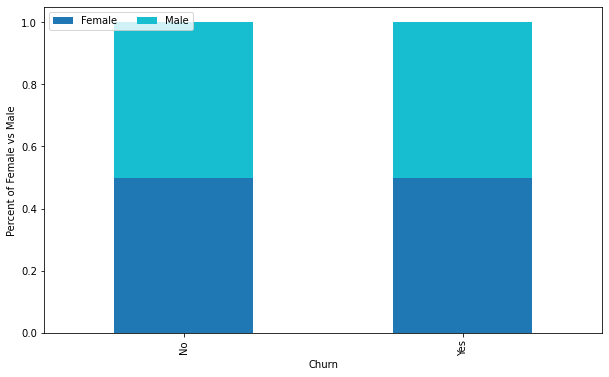

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

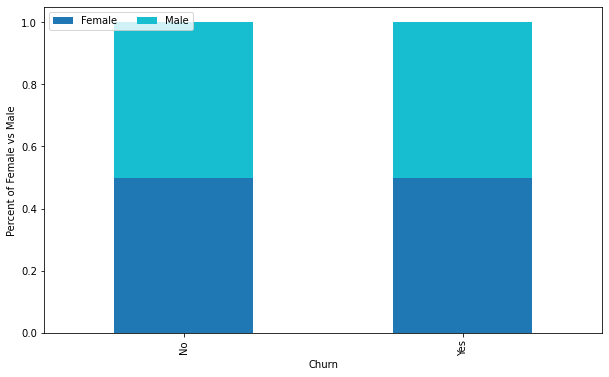

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

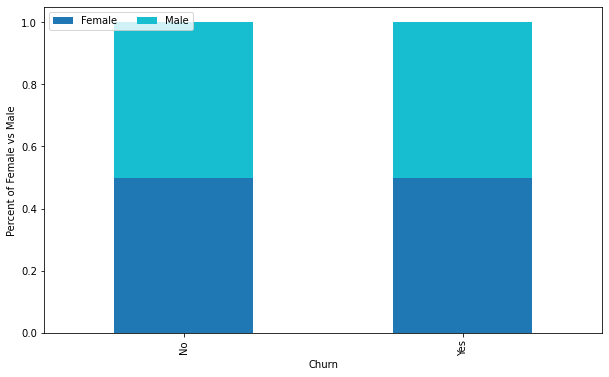

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

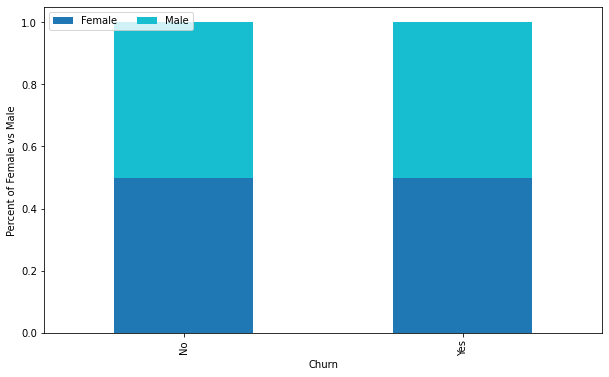

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

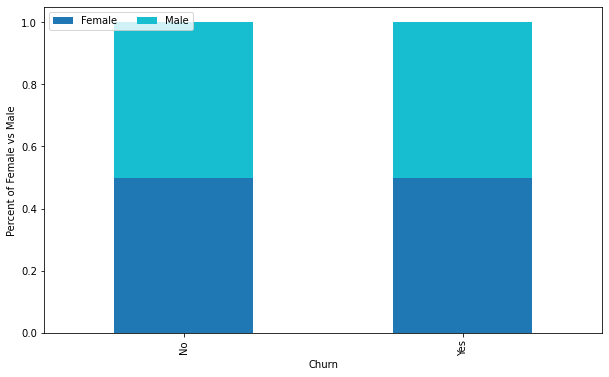

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

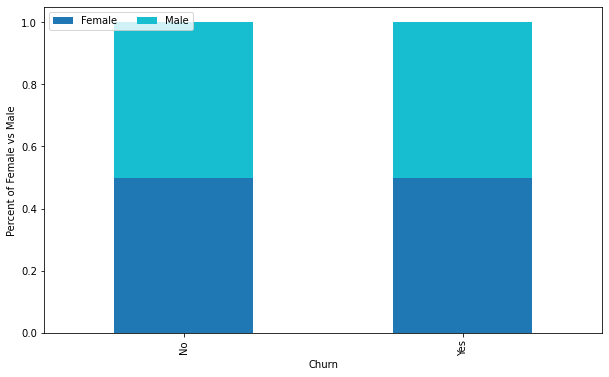

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

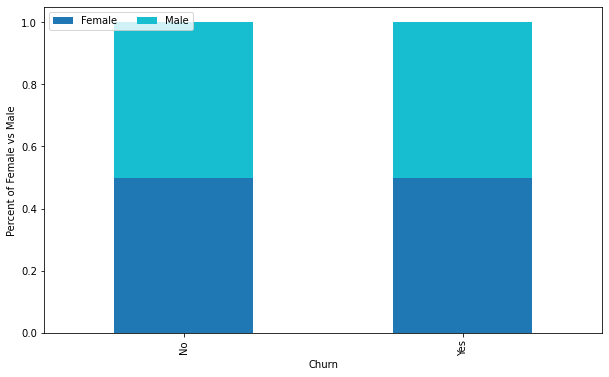

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

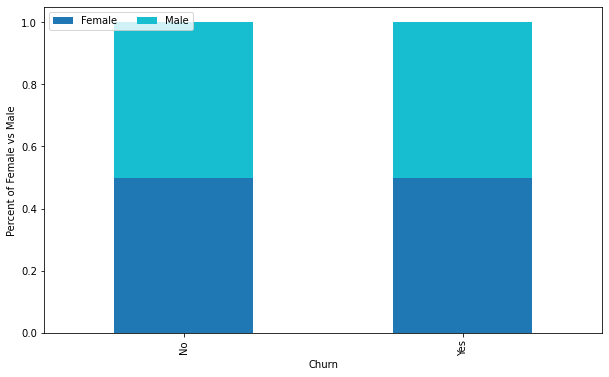

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

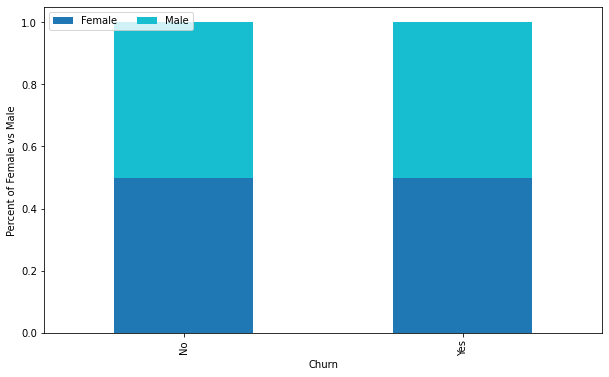

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

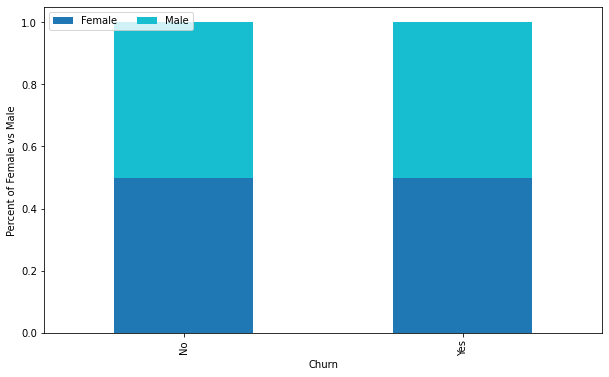

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

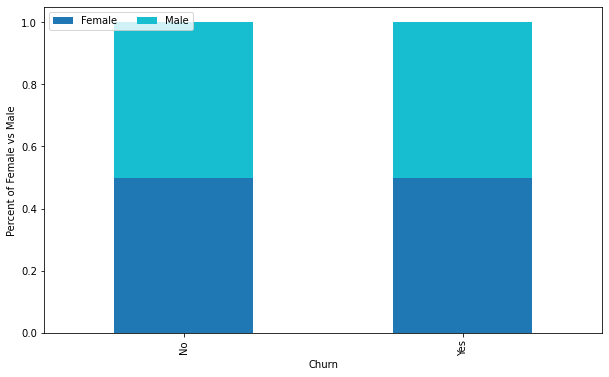

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

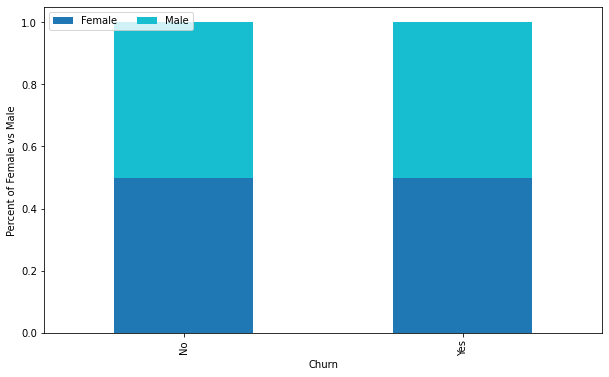

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

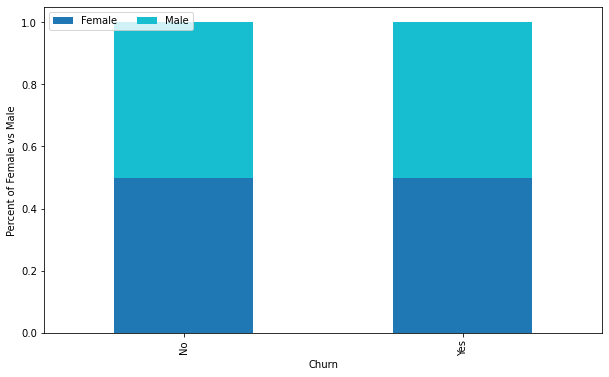

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

In [ ]:
churn_gender_ctab = pd.crosstab(index=train.churn, columns=train.gender, normalize="index")
churn_gender_ctab

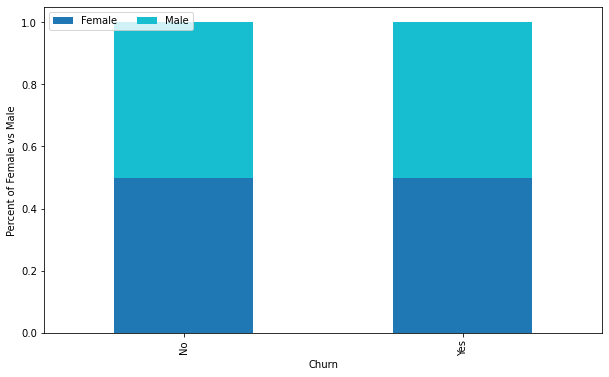

In [41]:
churn_gender_ctab.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Churn")
plt.ylabel("Percent of Female vs Male")
plt.show()

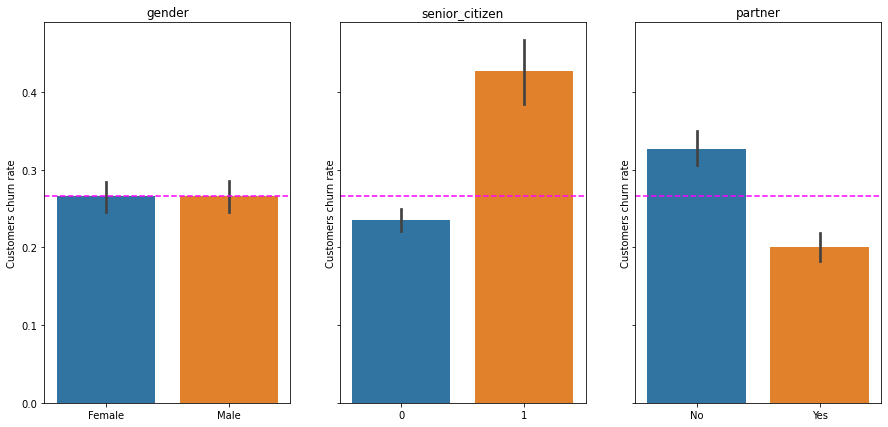

In [63]:
features = ['gender',
            'senior_citizen',
            'partner']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

churn = []
for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Gender does not seem to have any impact on churn
- Senior citizens churn at a higher rate
- Those who have a partner churn at a higher rate

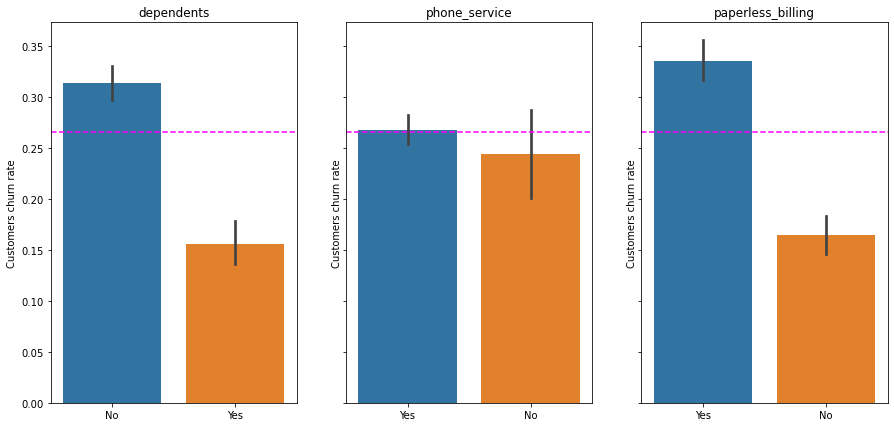

In [64]:
features = ['dependents',
            'phone_service',
            'paperless_billing']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Those who have dependents churn at a higher rate than those who don't
- Not having a phone service makes a customer slighly more encline to churn
- Those using paperless stay more than those who aren't

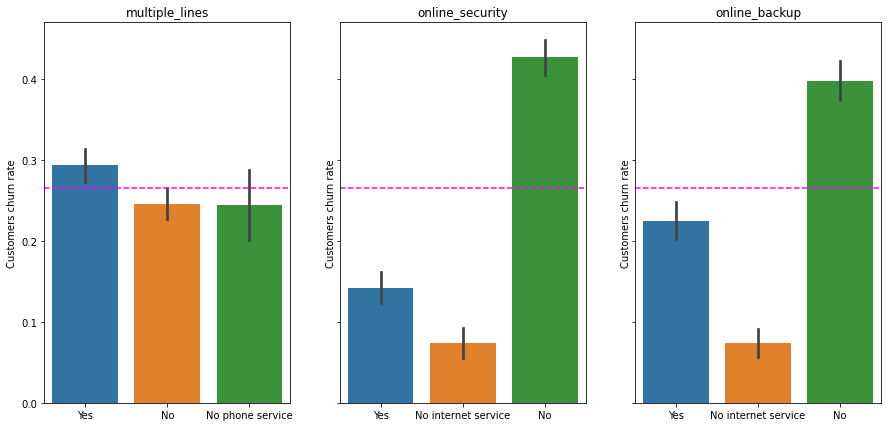

In [67]:
features = ['multiple_lines',
            'online_security',
            'online_backup']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].customers_churn_rate = train
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Having multiple lines make customers less likely to churn than those who have 1 or no phone service
- Having online security or no internet service leads customers to churn
- Having online backup or no internet service leads customers to churn

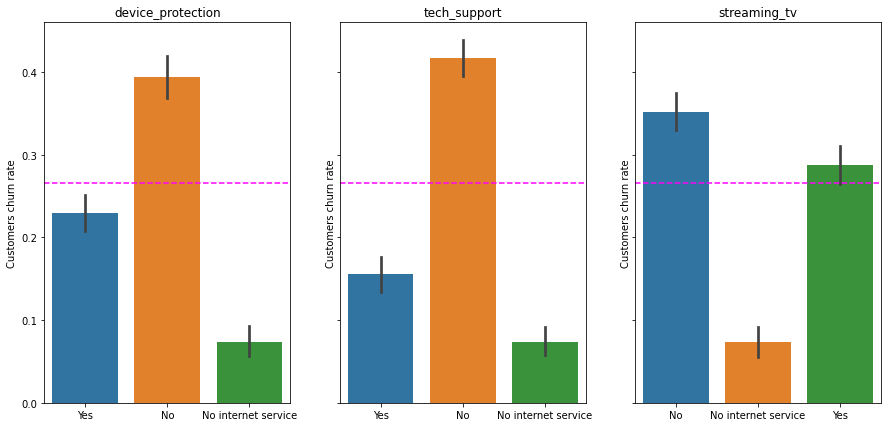

In [68]:
features = ['device_protection', \
            'tech_support', \
            'streaming_tv']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- Having device protection and tech support also leads customers to churn
- Not having internet service makes a customer more encline to churn

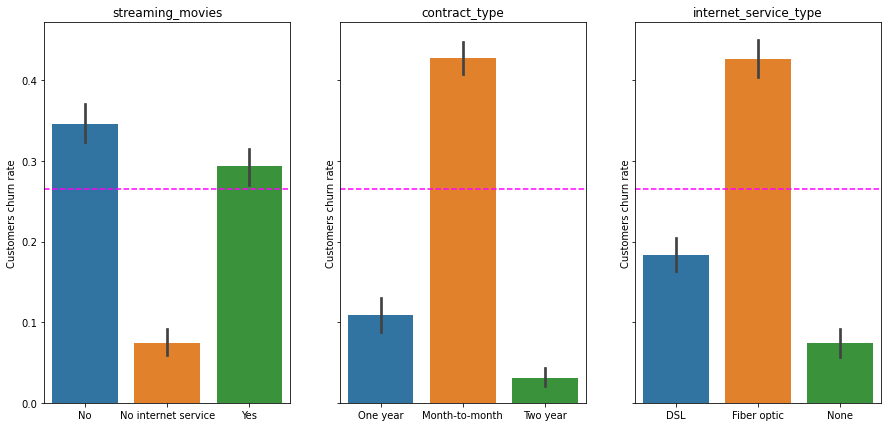

In [72]:
features = ['streaming_movies', \
            'contract_type', \
            'internet_service_type']

_,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)

for i, feature in enumerate(features):
    '''
    Enumerate() function allows me to iterate inside the 'feature'
    variable containing a set of features from the DataFrame.
    I am plotting barplots using ax to plot several at the time.
    '''
    sns.barplot(feature, 'churn_encoded', data=train, ax=ax[i])
    customers_churn_rate = train.churn_encoded.mean()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Customers churn rate')
    ax[i].set_title(feature)
    ax[i].axhline(customers_churn_rate, ls='--', color='fuchsia')

### Takeaways
- there are great disparities between different contract types and this is worth investigating
- Not having internet service makes a customer more encline to churn

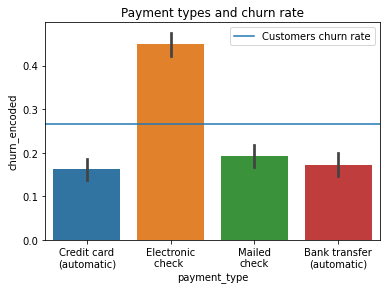

In [108]:
plt.title('Payment types and churn rate')
sns.barplot(x='payment_type', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate')
plt.xticks([0, 1, 2, 3], ['Credit card\n(automatic)', 'Electronic\ncheck ',
                          'Mailed\ncheck', 'Bank transfer\n(automatic)'])
plt.legend()
plt.show()

In [76]:
train.payment_type.value_counts()

Electronic check             1289
Credit card (automatic)       895
Mailed check                  891
Bank transfer (automatic)     862
Name: payment_type, dtype: int64

## Takeaways
- Electronic check users are less likely to churn (who are they? investigate if I have time)
- The users of other types of payment churn at a similar rate

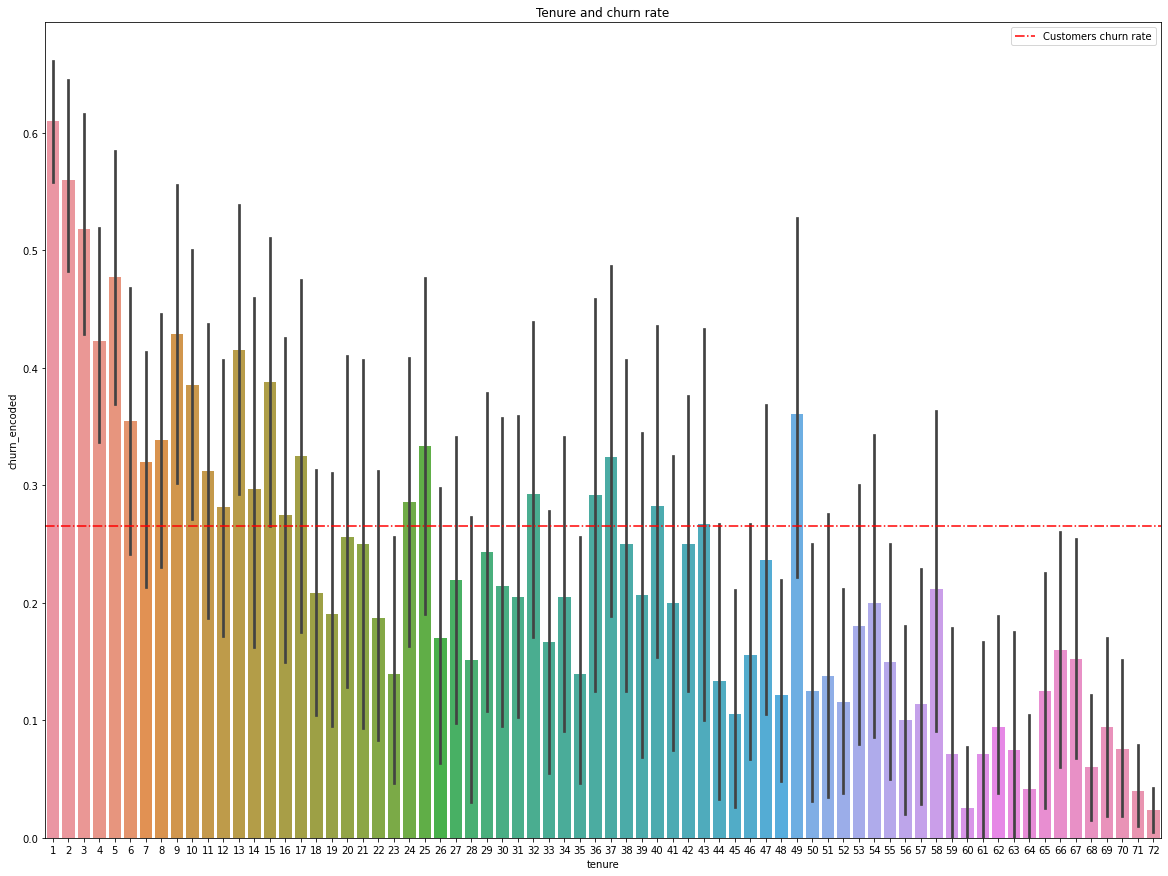

In [79]:


plt.figure(figsize=(20, 15))
plt.title('Tenure and churn rate')
sns.barplot(x='tenure', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate', ls='-.', color='red')
plt.legend()
plt.show()

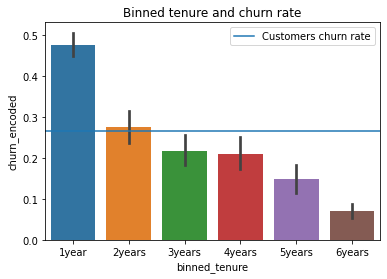

In [101]:
plt.title('Binned tenure and churn rate')
sns.barplot(x='binned_tenure', y='churn_encoded', data=train)
customers_churn_rate = train.churn_encoded.mean()
plt.axhline(customers_churn_rate, label= 'Customers churn rate', )
plt.legend()
plt.show()

## Takeaways
- The non-binned version of tenure has the same behavior as the binned one
- Higher tenure tend to churn more it seems

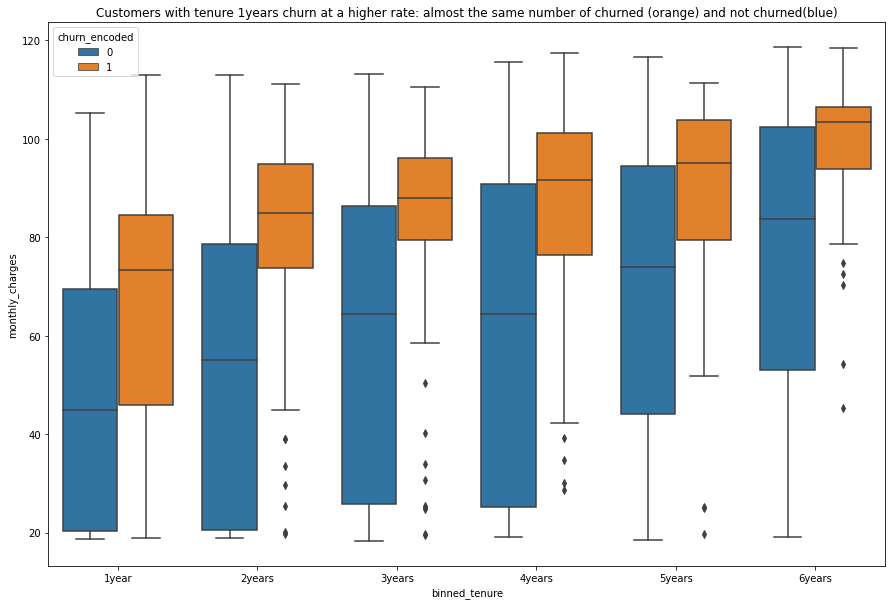

In [198]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate: almost the same number of churned (orange) and not churned(blue)')
sns.boxplot(x='binned_tenure', y='monthly_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

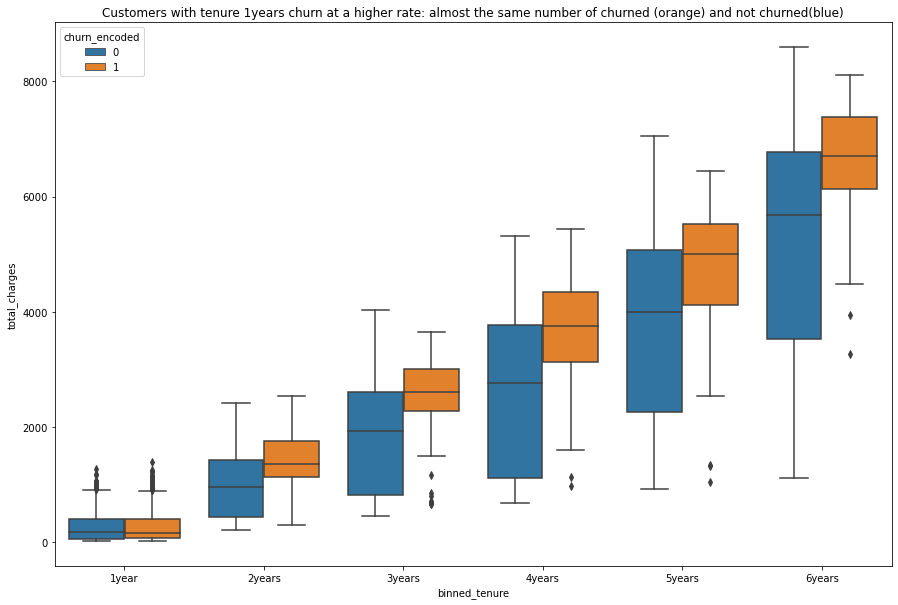

In [197]:
plt.figure(figsize=(15, 10))
plt.title('Customers with tenure 1years churn at a higher rate proportionally to other')
sns.boxplot(x='binned_tenure', y='total_charges', data=train, hue='churn_encoded')
customer_churn_rate = train.churn_encoded.mean()
plt.show()

In [73]:
train.binned_tenure.value_counts()

1year     1220
6years     818
2years     532
3years     469
5years     459
4years     439
Name: binned_tenure, dtype: int64

## Takeaways
- For Monthly charges, it seems that Customers with tenure 1years churn at a higher rate: almost the same number of churned (orange) and not churned(blue)
- For Total charges it seems like Customers with tenure 1years churn at a higher rate proportionally to their numbers: almost the same number of churned (orange) and not churned(blue). Meanwhile more 4, 5, & 6years tenure customers churned.

## C. Statistical Analysis of Features

$χ^2$

I do not have a normal distribution for tenure nor the other numeric values (monthly charges and total charges)
So I will use a t-test to understand the relationship between these features

**Assumptions**
The churn sample is far larger than 30 data pointsand thus meets the assumptions of normal distributions.

**Of all the features examined, a few stand out because of their level of churn on the graph. I am going to examine these features statistically**

**Selected features**

- Electronic check: electronic_check_encoded
- Tenure: binned_tenure
- Fiber optic: internet_service_type_Fiber optic
- Monthly charges: monthly_charges
- Contract type (Month-to-month): (train['contract_type'] == 'Month-to-month')
- No Internet Category: internet_service_type_None

In [130]:
# I set alpha for all calculations

α = .05

**Hypothesis setting**

- Null hypothesis = $H_{0}$
- Alternative hypothesis = $H_{A}$

## Electronic check

$H_{0}$: Electronic payment and churn are independent.

$H_{A}$: There is a dependency between Electronic payment and churn.

In [122]:
e_check_ctab = pd.crosstab(train['payment_type_Electronic check'] , train.churn)
e_check_ctab

churn,No,Yes
payment_type_Electronic check,,
0,2183,465
1,708,581


In [129]:
χ2, p_e_check, degf, expected_e_check = stats.chi2_contingency(e_check_ctab)


print(expected_e_check)
print(f"p-val: {p_e_check}")

[[1944.46736093  703.53263907]
 [ 946.53263907  342.46736093]]
p-val: 7.910587922260644e-75


In [135]:
null_hypothesis = 'Electronic payment and churn are independent'
alternative_hypothesis = 'There is a dependency between Electronic payment and churn'


if p_e_check < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

I reject the null hypothesis: There is a dependency between Electronic payment and churn


## Tenure

$H_{0}$: Tenure and churn are independent

$H_{A}$: There is a dependency between the Tenure and churn

In [138]:
b_tenure_ctab = pd.crosstab(train['binned_tenure'] , train.churn)
b_tenure_ctab

churn,No,Yes
binned_tenure,,
1year,639,581
2years,386,146
3years,367,102
4years,347,92
5years,391,68
6years,761,57


In [139]:
χ2, p_bt_check, degf, expected_b_tenure = stats.chi2_contingency(b_tenure_ctab)
print(expected_b_tenure)
print(f"p-val: {p_bt_check}")

[[895.86487173 324.13512827]
 [390.65582931 141.34417069]
 [344.39395479 124.60604521]
 [322.36449073 116.63550927]
 [337.0508001  121.9491999 ]
 [600.67005334 217.32994666]]
p-val: 2.6829703056467787e-102


In [146]:
null_hypothesis = 'Tenure and churn are independent'
alternative_hypothesis = 'There is a dependency between the Tenure and churn'

if p_e_check < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

I reject the null hypothesis: There is a dependency between the Tenure and churn


## Fiber optic

$H_{0}$: Fiber optic and churn are independent

$H_{A}$: There is a dependency between Fiber optic and churn

In [141]:
f_optic_ctab = pd.crosstab(train['internet_service_type_Fiber optic'] , train.churn)
f_optic_ctab

churn,No,Yes
internet_service_type_Fiber optic,,
0,1904,311
1,987,735


In [142]:
χ2, p_f_optic, degf, expected_f_optic = stats.chi2_contingency(f_optic_ctab)


print(expected_f_optic)
print(f"p-val: {p_f_optic}")

[[1626.50876302  588.49123698]
 [1264.49123698  457.50876302]]
p-val: 2.831419548361709e-90


In [143]:
null_hypothesis = 'Fiber optic and churn are independent'
alternative_hypothesis = 'There is a dependency between Fiber optic and churn'


if p_e_check < α:
    print('I reject the null hypothesis:', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis:', null_hypothesis)

I reject the null hypothesis: There is a dependency between Fiber optic and churn


## Monthly charges

$H_{0}$: There is no linear correlation between the monthly charges and the rate of churn

$H_{A}$: There is a linear correlation between the monthly charges and the rate of churn

In [144]:
null_hypothesis = 'There is no linear correlation between the monthly charges and the rate of churn'
alternative_hypothesis ='There is a linear correlation between the monthly charges and the rate of churn'

#Using a crosstab of churn to binned tenure
observed = pd.crosstab(train.churn, train.monthly_charges)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < α:
    print('I reject the null hypothesis')
    print('I have sufficient evidence to say that', alternative_hypothesis)
else:
    print('Fail to reject null hypothesis')
    print('I do not have sufficient evidence to reject the null hypothesis')

I reject the null hypothesis
I have sufficient evidence to say that Mean of monthly charges of churned customers > Mean of monthly charges of all customers


## Contract type: Month-to-month

$H_{0}$: there is no relationship between contract type and churn

$H_{A}$: there is a relationship between contract type and churn

In [158]:
null_hypothesis = 'There is no linear correlation between the Month-to-month Contracts and Churn'
alternative_hypothesis = 'There is a linear correlation between the Month-to-month Contracts and Churn'

observed = pd.crosstab((train['contract_type'] == 'Month-to-month'), train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

I reject the null hypthesis: There is a linear correlation between the Month-to-month Contracts and Churn


## No Internet

$H_{0}$: there is no relationship between contract type and churn

$H_{A}$: there is a relationship between contract type and churn

In [160]:
null_hypothesis = 'There is no linear correlation between the No Internet Category and Churn'
alternative_hypothesis = 'There is a linear correlation between the No Internet Category and Churn'

observed = pd.crosstab(train['internet_service_type_None'], train.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < α:
    print('I reject the null hypthesis:', alternative_hypothesis)
else:
    print('I fail to reject the null:', null_hypothesis)

I reject the null hypthesis: There is a linear correlation between the No Internet Category and Churn


## Summary Takeaways

- Who are not getting internet services?
- Customers who do not have internet services churn the most
- In general those who have services like online back up, online security churn more
- Those who have services such as streaming tv and movie churn less
- Those who have a DSL connection churn more
- Those who hahve a 1year and 2year contract are more likely to churn
- Customers with tenure 1years churn at a higher rate: almost the same number of churned and not churned

# Modeling

In this section, I am trying to predict the customers that will churn.

So, after examining the features through the lens of graphs and running statistical tests on those that appeared to be significant, I will use them to in my train model to predict which customer is likely to churn in the future. 

- Electronic check: electronic_check_encoded
- Tenure: binned_tenure
- Fiber optic: internet_service_type_Fiber optic
- Monthly charges: monthly_charges
- Contract type (Month-to-month): (train['contract_type'] == 'Month-to-month')
- No Internet Category: internet_service_type_None


- Month-to-month contract status: This has the smallest p-value
- Monthly tenure: This is similar to yearly tenure both in the size of the coefficient as well as the p-value, so we will use monthly tenure instead of yearly tenure.
- Fiber optic use: Customers with fiber optic plans appear to be churning at a very high rate, so we will include this feature.
- Electronic check payment type: Customers who pay by this method are churning at a much higher rate
- Has Internet: Although fiber optics use covers this partially, there is still enough additional information provided by this feature to include it.
- Monthly charges: This is similar to total charges, but I suspect that the model will perform better with this feature instead of total charges, as total charges is likely dependent on tenure.

Churn is the target variable and I will focus on churned customers (feature characteristic 1)

To evaluate the model I will use a confusion matrix with the following characteristics:

- TP
    * Prediction = customer will churn
    * Actual = customer churns
- TN
    * Predict = customer will not churn
    * Actual = customer does not churn
- FP
    * Predict = customer will churn
    * Actual = customer does NOT churn
- FN
    * Predict = customer will not churn
    * Actual = customer churns


- Objective: Identify customers that will churn
- Corresponding indicator: I want an indicator that tells me precisely who will churn but I don't want to say someone will not churn but they do churn. So I want to be able to predict well who will churn and who will not churn and ACCURACY is the best indicator for that.

## Decision trees

In [161]:
# I am going to first drop all the non numeric columns

non_num = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'binned_tenure']

train = train.drop(columns=non_num)
train.head()
validate = validate.drop(columns=non_num)
validate.head()
test = test.drop(columns=non_num)
test.head()

,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3311,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
6330,0,1,1,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
6156,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5313,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1176,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# create X & y version of train, where y is a series with just the target variable
# and X are all the features that I have selected. 

cols_to_drop = ['partner_encoded',
                'dependents_encoded',
                'phone_service_encoded',
                'paperless_billing_encoded',
                'multiple_lines_No phone service',
                'multiple_lines_Yes',
                'online_security_No internet service',
                'online_security_Yes',
                'online_backup_No internet service',
                'online_backup_Yes',
                'device_protection_No internet service',
                'device_protection_Yes',
                'tech_support_No internet service',
                'tech_support_Yes',
                'streaming_tv_No internet service',
                'streaming_tv_Yes',
                'streaming_movies_No internet service',
                'streaming_movies_Yes',
                'internet_service_type_Fiber optic',
                'payment_type_Credit card (automatic)',
                'payment_type_Electronic check',
                'payment_type_Mailed check']


train = train.drop(columns=cols_to_drop)
validate = validate.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [167]:
train.head()

,gender_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
5919,1,0,0,0,0,1,0,1,0,0
1915,0,0,0,0,0,0,1,1,0,0
5054,1,0,0,1,0,0,0,0,0,1
2355,0,0,0,0,0,0,0,0,0,1
6279,0,0,1,0,0,0,0,1,0,0


In [168]:
validate.head()

,gender_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
816,1,0,0,1,0,0,0,0,0,0
1488,1,0,0,0,0,0,1,0,1,0
4796,0,0,0,0,1,0,0,1,0,0
3213,1,0,0,1,0,0,0,0,1,1
5026,0,0,0,0,0,0,1,0,1,1


In [169]:
test.head()

,gender_encoded,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
3311,1,0,0,1,0,0,0,1,0,1
6330,0,0,0,1,0,0,0,0,1,1
6156,0,0,0,0,0,0,0,0,0,0
5313,0,0,0,1,0,0,0,0,0,0
1176,1,0,0,1,0,0,0,0,0,0


In [170]:
cols_to_drop = ['gender_encoded']

train = train.drop(columns=cols_to_drop)
validate = validate.drop(columns=cols_to_drop)
test = test.drop(columns=cols_to_drop)

In [171]:
train.head()

,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
5919,0,0,0,0,1,0,1,0,0
1915,0,0,0,0,0,1,1,0,0
5054,0,0,1,0,0,0,0,0,1
2355,0,0,0,0,0,0,0,0,1
6279,0,1,0,0,0,0,1,0,0


In [172]:
validate.head()

,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
816,0,0,1,0,0,0,0,0,0
1488,0,0,0,0,0,1,0,1,0
4796,0,0,0,1,0,0,1,0,0
3213,0,0,1,0,0,0,0,1,1
5026,0,0,0,0,0,1,0,1,1


In [173]:
test.head()

,churn_encoded,binned_tenure_2years,binned_tenure_3years,binned_tenure_4years,binned_tenure_5years,binned_tenure_6years,contract_type_One year,contract_type_Two year,internet_service_type_None
3311,0,0,1,0,0,0,1,0,1
6330,0,0,1,0,0,0,0,1,1
6156,0,0,0,0,0,0,0,0,0
5313,0,0,1,0,0,0,0,0,0
1176,0,0,1,0,0,0,0,0,0


In [183]:
X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded

In [190]:
y_train

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    1
3444    0
1002    0
4192    0
Name: churn_encoded, Length: 3937, dtype: int64

## Baseline

In [191]:
baseline_model = pd.DataFrame({'actual': y_train})
baseline_model['baseline'] = 0
baseline_confusion_matrix = pd.crosstab(baseline_model.actual, baseline_model.baseline)
baseline_confusion_matrix

baseline,0
actual,
0,2891
1,1046


In [199]:
baseline_accuracy = (baseline_model.baseline == baseline_model.actual).mean()

print(f'Baseline Accuracy: {baseline_accuracy:10%}')

Baseline Accuracy: 73.431547%


In [211]:
# Running several other model to see which one has the 

best_result = []
for i in range(2, 20):
    best_depth = DecisionTreeClassifier(max_depth=i, random_state=175)
    best_depth = best_depth.fit(X_train, y_train)
    y_pred = best_depth.predict(X_train)
    report_i = classification_report(y_train, y_pred, output_dict=True)

    best_result.append(best_depth.score(X_train, y_train))
    best_result_accuracy = max(best_result)
    best_result_num = best_result.index(best_result_accuracy)
    top_train_depth = best_result_num + 1

print(f'DecisionTree depth {i}\n')
print(pd.DataFrame(report_i))
print('\n=======================\n')
print(f'The Top Depth is {top_train_depth}')
print(f'Accuracy = {best_result_accuracy:10%}')


DecisionTree depth 19

                     0            1  accuracy    macro avg  weighted avg
precision     0.828956     0.589226  0.774702     0.709091      0.765263
recall        0.873400     0.501912  0.774702     0.687656      0.774702
f1-score      0.850598     0.542075  0.774702     0.696337      0.768628
support    2891.000000  1046.000000  0.774702  3937.000000   3937.000000


The Top Depth is 7
Accuracy = 77.470155%


In [213]:
# Evaluating the in-sample result with a prediction and Calculating its probability

top_depth = DecisionTreeClassifier(random_state = 1, max_depth = top_train_depth)
top_depth.fit(X_train, y_train)
y_pred = top_depth.predict(X_train)
y_pred_proba = top_depth.predict_proba(X_train)

In [ ]:
tp, fn, fp, tn = print_return_cm_details(y_pred2)

In [214]:
# Running a classification report matrix to find out more

pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2424,467
1,452,594


In [215]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2891
           1       0.56      0.57      0.56      1046

    accuracy                           0.77      3937
   macro avg       0.70      0.70      0.70      3937
weighted avg       0.77      0.77      0.77      3937



# Crosscheck with validate

In [217]:
y_pred = top_depth.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

Model 2: Decision Tree
Accuracy: 0.74
[[1011  228]
 [ 212  237]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1239
           1       0.51      0.53      0.52       449

    accuracy                           0.74      1688
   macro avg       0.67      0.67      0.67      1688
weighted avg       0.74      0.74      0.74      1688



### Model 2: Decision Tree
### Accuracy: 0.74

# Crosscheck with test

In [219]:
y_pred = top_depth.predict(X_validate)

print(confusion_matrix(y_validate, y_pred))

print(classification_report(y_validate, y_pred))

[[1011  228]
 [ 212  237]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1239
           1       0.51      0.53      0.52       449

    accuracy                           0.74      1688
   macro avg       0.67      0.67      0.67      1688
weighted avg       0.74      0.74      0.74      1688



## Model 7 fo the Decision Tree
## Accuracy: 0.74

## CSV FILE

In [ ]:
y_predictions = model.predict(X_test)
y_proba = model.predict_proba(X_test)

predictions = pd.DataFrame({
    "customer_id": test.customer_id, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_predictions,
    "probability_of_churn", y_proba
})

predictions.to_csv("predictions.csv")

# Conclusions

My model performed better than the baseline and could be used to prerdict whether a customer will churn with an accuracy of 74% and a recall (capacity to predict a customer will churn without )

Churn is driven by so many variables
With additional time, I could:
    - Dig deeper with a K-Nearest Neighbor, a Random Forest, and a Logistic Regression model
    - Investigate deeper statistically other features to see for example if the assumption I made about their relative impact is true or false
    - Investigate whether Streaming TV and Streaming Movies help keep customers from churning and if it could be a good way to keep them
    